In [178]:
import pandas as pd
# import pandasql as ps
import matplotlib.pyplot as plt
# Import argsort
from numpy import argsort
from Functions.connection.connection import *
from Functions.AlertP1.data_cleaning import *
from Functions.AlertP1.features import *


## Connection to databse

In [179]:
alertP1=connection("/Users/MarouanKamoun/Desktop/HGO pbl/credentials.csv")

Tables: [('ConsultaUrgencia_doentespedidosconsultaNeurologia2012',), ('consultaneurologia2012',), ('consultaneurologia201216anon_true',)]
196


## Data cleaning

In [180]:
#changing columns with date to a datetime
date_format_alertP1(alertP1)
#change the blank values in proveniencia and priority to unknown
replace_blank(alertP1)
#create a column with the output of a referral and select the refused and accepted ones
alertP1=result(alertP1)
#add text length variable
alertP1=text_length(alertP1)
alertP1=alertP1.sort_values('DATA_RECEPCAO')
alertP1

c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\data_cleaning.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['PROVENIENCIA'][alertP1['PROVENIENCIA']=='']='unknown'
c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\data_cleaning.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['CTH_PRIOR'][alertP1['CTH_PRIOR']=='']='unknown'


,ID_DOENTE,PROCESSO,COD_REFERENCIA,COD_PZ,COD_UNID_SAUDE_PROV,UNID_PROV,TIPO_UNID,PROVENIENCIA,COD_CTH_PRIOR,CTH_PRIOR,...,OBSERVACOES,Mês_entrada,Ano_entrada,trata data recusa,resume saída,mês_saida,ano_saida,Texto,result,text_length
9915,SEAFHB,BBLVVLDC,LOHHHLOV,SFGHADG,3150305,UCSP RAINHA D. LEONOR,CS/USF,CTH,,unknown,...,,1,2012,2012-01-10,30/03/2012,3,2012,,1,0
6944,ZDGGGA,BMJNMVVJ,LOHHHHRS,,0,,OUTRA,unknown,,unknown,...,,1,2012,2012-01-02,01/08/2012,8,2012,,1,0
6542,ZZZBGG,BMJIBILB,LOHHHOHO,SSBSEGA,3150301,FRANCISCO X NORONHA,CS/USF,CTH,,unknown,...,,1,2012,2012-01-10,10/01/2012,1,2012,,0,0
3067,DSHCGG,BMIBJIE,LOHHHOUQ,SFAAECF,3151672,USF AMORA SAUDAVEL,CS/USF,CTH,,unknown,...,,1,2012,2012-01-10,12/03/2012,3,2012,,1,0
2078,AESBSC,NINBJJC,LOHHHPTO,,0,,OUTRA,unknown,,unknown,...,,1,2012,2013-01-15,22/01/2013,1,2013,,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7353,ZSGCCF,BMJCJLIJ,LSHVLHUO,ZEFHCECF,3150672,USF FEIJO-CS COVA DA PIEDADE,CS/USF,CTH,3,Normal,...,,12,2016,2017-02-20,20/03/2017,3,2017,,1,0
4044,CDABCC,VLNVILNB,LSHVLLUO,ZEFZDDBB,3150371,USF S JOAO DO PRAGAL-CS ALMADA,CS/USF,CTH,3,Normal,...,,12,2016,2017-02-20,21/03/2017,3,2017,,1,0
6424,FCDEF,BIJIMMIJ,LSHVLOQU,,0,,OUTRA,SAM,3,Normal,...,Marcar para Dr J Coimbra dia 1/3/2018 às 18.00,12,2016,2018-02-08,01/03/2018,3,2018,,1,0
9425,EBESGE,BDVDJJIB,LSHVLLVV,,0,,OUTRA,SAM,,unknown,...,,12,2016,2016-12-30,04/09/2017,9,2017,,1,0


## All dataset

In [198]:
data=alertP1.copy()
# compute the number of rows to select
n = int(len(data) * 0.8)

# select the first 80% of rows using slicing
first_80_percent_df = data.iloc[:n]
#select the last 20%
last_20_percent_df=data.iloc[n:]
last_20_percent_df['DATA_RECEPCAO']

2767   2016-02-10
6557   2016-02-10
1400   2016-02-10
3882   2016-02-10
8946   2016-02-10
          ...    
7353   2016-12-29
4044   2016-12-30
6424   2016-12-30
9425   2016-12-30
5513   2016-12-30
Name: DATA_RECEPCAO, Length: 1875, dtype: datetime64[ns]

In [182]:
df = first_80_percent_df.dropna(subset=['DATA_RECEPCAO'])
df['Total'] = 1
df=df[["DATA_RECEPCAO","result","Total"]]
df=df[df["result"]!=""]
df["result"]=df["result"].astype(int)
df["DATA_RECEPCAO"] =pd.to_datetime(df["DATA_RECEPCAO"])
df.set_index("DATA_RECEPCAO", inplace=True)


In [183]:
#WEEKLY referral distribution for all sample
WEEKLY_data = df.resample('W').agg({'result': 'sum', 'Total': 'sum'})
WEEKLY_data["Acceptance_Rate"]=WEEKLY_data["result"]/WEEKLY_data["Total"]
#Monthly distribution
monthly_data = df.resample('M').agg({'result': 'sum', 'Total': 'sum'})
monthly_data["Acceptance_Rate"]=monthly_data["result"]/monthly_data["Total"]



In [184]:
df = last_20_percent_df.dropna(subset=['DATA_RECEPCAO'])
df['Total'] = 1
df=df[["DATA_RECEPCAO","result","Total"]]
df=df[df["result"]!=""]
df["result"]=df["result"].astype(int)
df["DATA_RECEPCAO"] =pd.to_datetime(df["DATA_RECEPCAO"])
df.set_index("DATA_RECEPCAO", inplace=True)


In [185]:
#WEEKLY referral distribution for all sample
WEEKLY_data_train = df.resample('W').agg({'result': 'sum', 'Total': 'sum'})
WEEKLY_data_train["Acceptance_Rate"]=WEEKLY_data_train["result"]/WEEKLY_data_train["Total"]
#Monthly distribution
monthly_data_train = df.resample('M').agg({'result': 'sum', 'Total': 'sum'})
monthly_data_train["Acceptance_Rate"]=monthly_data_train["result"]/monthly_data_train["Total"]


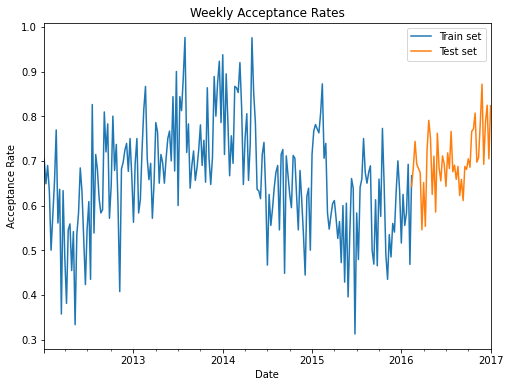

In [186]:
# create a single plot
ax = WEEKLY_data["Acceptance_Rate"].plot(x='Date', y='Value', figsize=(8,6),)

# plot data from the second dataframe onto the same plot
WEEKLY_data_train["Acceptance_Rate"].plot(x='Date', y='Value', ax=ax)

# set title and labels
ax.set_title('Weekly Acceptance Rates')
ax.set_xlabel('Date')
ax.set_ylabel('Acceptance Rate')
ax.legend(['Train set', 'Test set'])


# display the plot
plt.show()

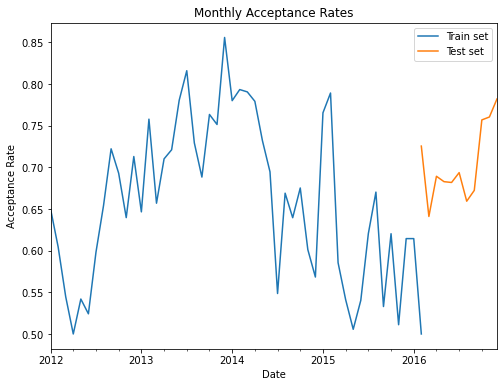

In [187]:
# create a single plot
ax = monthly_data["Acceptance_Rate"].plot(x='Date', y='Value', figsize=(8,6),)

# plot data from the second dataframe onto the same plot
monthly_data_train["Acceptance_Rate"].plot(x='Date', y='Value', ax=ax)

# set title and labels
ax.set_title('Monthly Acceptance Rates')
ax.set_xlabel('Date')
ax.set_ylabel('Acceptance Rate')
ax.legend(['Train set', 'Test set'])

# display the plot
plt.show()

##  text variables

In [200]:
data=alertP1.copy()
data=data[data['text_length']>0]
# compute the number of rows to select
n = int(len(data) * 0.8)

# select the first 80% of rows using slicing
first_80_percent_df = data.iloc[:n]
#select the last 20%
last_20_percent_df=data.iloc[n:]
last_20_percent_df['DATA_RECEPCAO']


1765   2016-01-19
629    2016-01-19
175    2016-01-20
552    2016-01-20
898    2016-01-21
          ...    
1606   2016-12-22
1177   2016-12-23
1335   2016-12-23
1332   2016-12-28
1227   2016-12-28
Name: DATA_RECEPCAO, Length: 322, dtype: datetime64[ns]

In [189]:
df = first_80_percent_df.dropna(subset=['DATA_RECEPCAO'])
df['Total'] = 1
df=df[["DATA_RECEPCAO","result","Total"]]
df=df[df["result"]!=""]
df["result"]=df["result"].astype(int)
df["DATA_RECEPCAO"] =pd.to_datetime(df["DATA_RECEPCAO"])
df.set_index("DATA_RECEPCAO", inplace=True)

In [190]:
#WEEKLY referral distribution for all sample
WEEKLY_data = df.resample('W').agg({'result': 'sum', 'Total': 'sum'})
WEEKLY_data["Acceptance_Rate"]=WEEKLY_data["result"]/WEEKLY_data["Total"]
#Monthly distribution
monthly_data = df.resample('M').agg({'result': 'sum', 'Total': 'sum'})
monthly_data["Acceptance_Rate"]=monthly_data["result"]/monthly_data["Total"]


In [191]:
df = last_20_percent_df.dropna(subset=['DATA_RECEPCAO'])
df['Total'] = 1
df=df[["DATA_RECEPCAO","result","Total"]]
df=df[df["result"]!=""]
df["result"]=df["result"].astype(int)
df["DATA_RECEPCAO"] =pd.to_datetime(df["DATA_RECEPCAO"])
df.set_index("DATA_RECEPCAO", inplace=True)


In [192]:
#WEEKLY referral distribution for all sample
WEEKLY_data_train = df.resample('W').agg({'result': 'sum', 'Total': 'sum'})
WEEKLY_data_train["Acceptance_Rate"]=WEEKLY_data_train["result"]/WEEKLY_data_train["Total"]
#Monthly distribution
monthly_data_train = df.resample('M').agg({'result': 'sum', 'Total': 'sum'})
monthly_data_train["Acceptance_Rate"]=monthly_data_train["result"]/monthly_data_train["Total"]

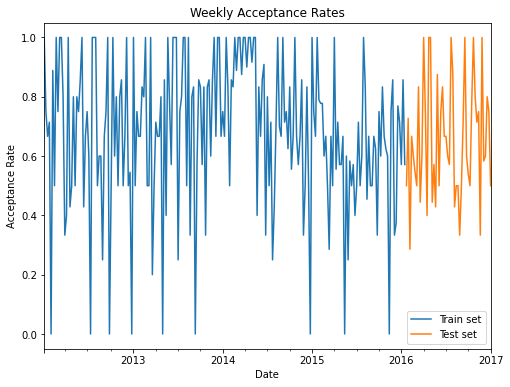

In [193]:
# create a single plot
ax = WEEKLY_data["Acceptance_Rate"].plot(x='Date', y='Value', figsize=(8,6),)

# plot data from the second dataframe onto the same plot
WEEKLY_data_train["Acceptance_Rate"].plot(x='Date', y='Value', ax=ax)

# set title and labels
ax.set_title('Weekly Acceptance Rates')
ax.set_xlabel('Date')
ax.set_ylabel('Acceptance Rate')
ax.legend(['Train set', 'Test set'])

# display the plot
plt.show()

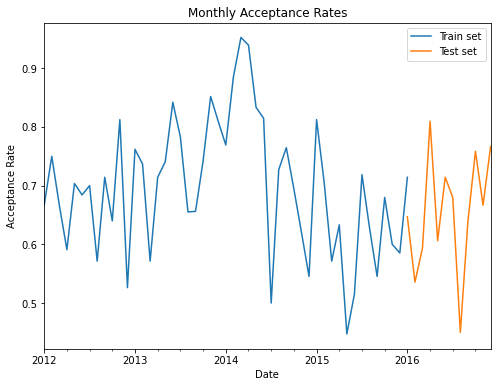

In [194]:
# create a single plot
ax = monthly_data["Acceptance_Rate"].plot(x='Date', y='Value', figsize=(8,6),)

# plot data from the second dataframe onto the same plot
monthly_data_train["Acceptance_Rate"].plot(x='Date', y='Value', ax=ax)

# set title and labels
ax.set_title('Monthly Acceptance Rates')
ax.set_xlabel('Date')
ax.set_ylabel('Acceptance Rate')
ax.legend(['Train set', 'Test set'])

# display the plot
plt.show()